In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats
import scipy.stats

In [2]:
##Initialising font design 
titlefont = {'color':  'dimgrey',
        'weight': 'bold',
        'size': 18}
font1 = {'color':  'skyblue',
        'weight': 'normal',
        'size': 15}
font2 = {'color':  'dimgray',
        'weight': 'normal',
        'size': 12}
font3 = {'color':  'maroon',
        'weight': 'bold',
        'size': 18}

# Main data - Personal well-being estimates by local authority

In [3]:
#Use only inner london boroughs (except City of London) from the years 2011 to 2017
dfFeelingsYears = pd.read_excel('./wellbeing.xlsx', sheet_name='Dataset',skiprows=[0,1, *range(23,44)], usecols=[0,2,3,4,8,12,16,20,24,28])
#rename columns
dfFeelingsYears.rename(columns={'Geography': 'Boroughs', 'MeasureOfWellbeing':'Feeling',
                               '2011-12':'2011','2012-13':'2012','2013-14':'2013', '2014-15':'2014',
                               '2015-16':'2015', '2016-17':'2016', '2017-18':'2017'}, inplace=True)
#initialise as category
dfFeelingsYears['Boroughs'] = dfFeelingsYears['Boroughs'].astype('category')

dfFeelingsYears

,Boroughs,Feeling,Estimate,2011,2012,2013,2014,2015,2016,2017
0,Camden,Anxiety,Average,3.81,3.24,3.41,3.21,3.16,3.38,3.62
1,Camden,Anxiety,Fair,21.39,18.05,19.95,16.18,16.36,20.05,21.68
2,Camden,Anxiety,Good,27.49,37.59,33.45,33.34,30.38,24.63,25.26
3,Camden,Anxiety,Poor,27.78,19.37,20.92,21.21,21.92,25.33,26.77
4,Camden,Anxiety,Very good,23.33,24.99,25.68,29.28,31.34,29.98,26.29
...,...,...,...,...,...,...,...,...,...,...
254,Westminster,Worthwhile,Average,7.59,7.36,7.56,7.70,7.57,7.77,7.77
255,Westminster,Worthwhile,Fair,18.12,21.27,15.47,14.35,15.10,12.45,12.17
256,Westminster,Worthwhile,Good,46.61,53.76,54.29,52.36,47.95,49.82,51.47
257,Westminster,Worthwhile,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Melt columns together
tsFeels = dfFeelingsYears.melt(id_vars=['Boroughs', 'Feeling', 'Estimate'], var_name ='Year', value_name='Measure')
#initialising the types of the columns
tsFeels['Year'] = tsFeels['Year'].astype('int64')
tsFeels['Feeling'] = tsFeels['Feeling'].astype('category')
tsFeels['Estimate'] = tsFeels['Estimate'].astype(pd.CategoricalDtype(categories=['Poor','Fair','Average','Good','Very good'],ordered=True))

#create a datetime series by parsing the years
tsFeels['Year'] = pd.to_datetime(tsFeels['Year'], format='%Y')

#assign the year column to the index, creating a DatetimeIndex
tsFeels.set_index('Year', inplace=True)
#convert the DatetimeIndex to a PeriodIndex of the year frequency
tsFeels = tsFeels.to_period('Y')


#assign all indicator variables to the index
tsFeels.set_index(['Boroughs', 'Feeling', 'Estimate'], inplace= True, append=True)
tsFeels.sort_index(inplace=True)

#only get the average life satisfaction
tsFeels = tsFeels.xs(['Average','Life Satisfaction'],level=['Estimate','Feeling'])
tsFeels

Measure
Year Boroughs                       
2011 Camden                     7.25
     Hackney                    7.00
     Hammersmith and Fulham     7.38
     Haringey                   7.11
     Islington                  7.09
...                              ...
2017 Newham                     7.47
     Southwark                  7.47
     Tower Hamlets              7.51
     Wandsworth                 7.64
     Westminster                7.57

[91 rows x 1 columns]

# Secondary data- Average Income of Tax Payers, Borough

In [5]:
#Use only inner london boroughs (except City of London) from the years 2011 to 2017
dfIncomeMedian =  pd.read_excel('./income.xlsx', sheet_name='Total Income',skiprows=[0,2,*range(3,9),*range(10,14),*range(17,21),23,26,28,29,31,33, *range(36,53)], usecols='B, AL, AO, AR, AU, AX, BA, BD')
#rename columns
dfIncomeMedian.rename(columns={'Area':'Boroughs', 'Median £.11':'2011', 'Median £.12':'2012', 'Median £.13':'2013',
                            'Median £.14':'2014', 'Median £.15':'2015', 'Median £.16':'2016','Median £.17':'2017'}, inplace=True)
#initalise as category
dfIncomeMedian['Boroughs'] = dfIncomeMedian['Boroughs'].astype('category') 

dfIncomeMedian

,Boroughs,2011,2012,2013,2014,2015,2016,2017
0,Camden,30400,31600,32000,33100,34400,35500,37300
1,Hackney,23300,24300,26000,26000,27800,28000,29400
2,Hammersmith and Fulham,27600,27600,30100,30100,32000,32300,33200
3,Haringey,22200,23300,24400,25800,25600,25100,27100
4,Islington,28100,28500,28700,31000,31100,32900,33400
5,Kensington and Chelsea,37200,37800,37600,38700,37500,39500,40400
6,Lambeth,24600,26000,26800,27300,28400,29200,29900
7,Lewisham,22900,23000,24000,24900,25800,26700,27300
8,Newham,17600,18500,20100,20200,22100,22500,24100
9,Southwark,24300,25000,26200,27700,27100,29400,29400


In [6]:
#Melt columns together
tsMedian = dfIncomeMedian.melt(id_vars=['Boroughs'], var_name ='Year', value_name='Median Amount(£)')
#initialise type of Year
tsMedian['Year'] = tsMedian['Year'].astype('int64')
#create a datetime series by parsing they years
tsMedian['Year'] = pd.to_datetime(tsMedian['Year'], format='%Y')
#assign the year column to the index, creating a DatetimeIndex
tsMedian.set_index('Year', inplace=True)
#convert the DatetimeIndex to a PeriodIndex of the year frequency
tsMedian = tsMedian.to_period('Y')
#assign all indicator variables to the index
tsMedian.set_index(['Boroughs'], inplace= True, append=True)
tsMedian.sort_index(inplace=True)
tsMedian.head(14)

Median Amount(£)
Year Boroughs                                
2011 Camden                             30400
     Hackney                            23300
     Hammersmith and Fulham             27600
     Haringey                           22200
     Islington                          28100
     Kensington and Chelsea             37200
     Lambeth                            24600
     Lewisham                           22900
     Newham                             17600
     Southwark                          24300
     Tower Hamlets                      24700
     Wandsworth                         29400
     Westminster                        32400
2012 Camden                             31600

## Combining data

In [7]:
#append the two tables together
ts = tsFeels.append(tsMedian).sort_index()
#fill in nan values
ts = ts.ffill()
#skipping duplicates
ts = ts.iloc[1::2]
#initialising as type int
ts['Median Amount(£)']= ts['Median Amount(£)'].astype('int64')
ts.head(14)

Measure  Median Amount(£)
Year Boroughs                                         
2011 Camden                     7.25             30400
     Hackney                    7.00             23300
     Hammersmith and Fulham     7.38             27600
     Haringey                   7.11             22200
     Islington                  7.09             28100
     Kensington and Chelsea     7.57             37200
     Lambeth                    7.13             24600
     Lewisham                   7.05             22900
     Newham                     7.12             17600
     Southwark                  7.36             24300
     Tower Hamlets              7.02             24700
     Wandsworth                 7.46             29400
     Westminster                7.33             32400
2012 Camden                     7.24             31600

# Plot descriptive statistics
- Measures of central tendency
- Measures of distribution

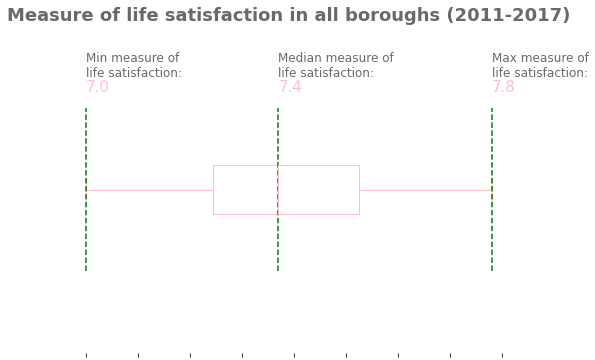

In [8]:
#make figure big
fig = plt.figure(figsize=(8,6))
#initialise plot
ax = ts['Measure'].plot.box(color='pink',vert=False)
#remove spines for presentation
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#remove lables, but keep xticks for measure
ax.axes.get_yaxis().set_ticks([])
ax.set_xticklabels('')

#plot dashed lines to show the min, median and mode of boxplot
plt.axvline(ts['Measure'].median(),ymin=0.25, ymax=0.75, color='g', linestyle='--')
plt.axvline(ts['Measure'].min(), ymin=0.25, ymax=0.75, color='g', linestyle='--')
plt.axvline(ts['Measure'].max(),ymin=0.25, ymax=0.75, color='g', linestyle='--')

#Annotate the labels for presentation
ax.text(ts['Measure'].median(), 1.3,'Median measure of\nlife satisfaction:\n', fontdict=font2)
ax.text(ts['Measure'].median(), 1.3,'7.4', fontdict=font1, color='pink') 

ax.text(ts['Measure'].min(),1.3,'Min measure of\nlife satisfaction:\n', fontdict=font2)
ax.text(ts['Measure'].min(),1.3,'7.0', fontdict=font1, color='pink')

ax.text(ts['Measure'].max(),1.3,'Max measure of\nlife satisfaction:\n', fontdict=font2)
ax.text(ts['Measure'].max(),1.3,'7.8', fontdict=font1, color='pink')

ax.set_title('Measure of life satisfaction in all boroughs (2011-2017)',fontdict=titlefont)
#plt.savefig('measurebox.png', dpi=300, bbox_inches='tight')
plt.show()

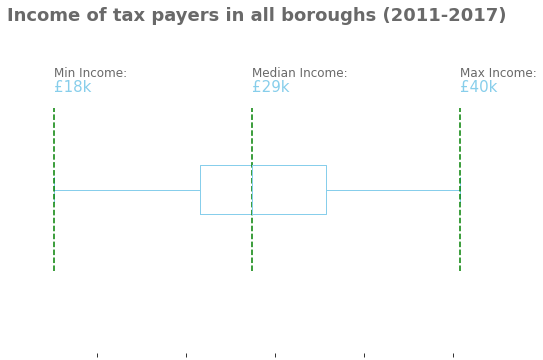

In [9]:
#make figure big
fig = plt.figure(figsize=(8,6))
#initialise plot
ax = ts['Median Amount(£)'].plot.box(color='skyblue', vert=False)

#remove spines for presentation
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#remove lables, but keep xticks for measure
ax.axes.get_yaxis().set_ticks([])
ax.set_xticklabels('')


#plot dashed lines to show the min, median and mode of boxplot
plt.axvline(ts['Median Amount(£)'].median(),ymin=0.25, ymax=0.75, color='g', linestyle='--')
plt.axvline(ts['Median Amount(£)'].min(), ymin=0.25, ymax=0.75, color='g', linestyle='--')
plt.axvline(ts['Median Amount(£)'].max(),ymin=0.25, ymax=0.75, color='g', linestyle='--')

#Annotate the labels for presentation
ax.text(ts['Median Amount(£)'].median(), 1.3,'Median Income:\n', fontdict=font2)
ax.text(ts['Median Amount(£)'].median(), 1.3,'£29k', fontdict=font1) 

ax.text(ts['Median Amount(£)'].min(),1.3,'Min Income:\n', fontdict=font2)
ax.text(ts['Median Amount(£)'].min(),1.3,'£18k', fontdict=font1)

ax.text(ts['Median Amount(£)'].max(),1.3,'Max Income:\n', fontdict=font2)
ax.text(ts['Median Amount(£)'].max(),1.3,'£40k', fontdict=font1)

#set title
ax.set_title('Income of tax payers in all boroughs (2011-2017)',fontdict=titlefont)

#plt.savefig('incomebox.png', dpi=300, bbox_inches='tight')
plt.show()

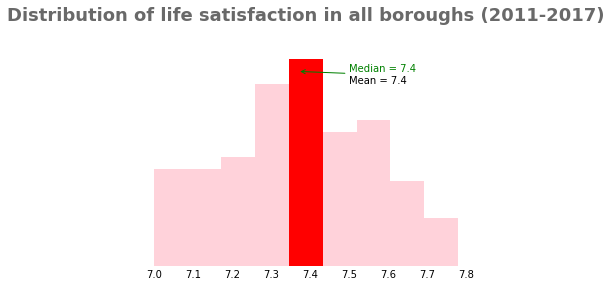

In [10]:
distMeasure = ts['Measure'].reset_index(level='Year', drop=True)
#ax = distMeasure.hist(grid=False, bins=9)
n, bins, patches = plt.hist(distMeasure, bins=9, facecolor='pink', linewidth=0.5, alpha=0.7)

# Make one bin stand out   
patches[4].set_fc('red') # Set color
patches[4].set_alpha(1) # Set opacity

#remove spines for presentation
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

#remove y axis and xticks
plt.gca().tick_params(axis=u'both', which=u'both',length=0)
plt.gca().axes.get_yaxis().set_ticks([])

#Arrow and text annotating median and mean
plt.gca().annotate('Median = 7.4\n',xy=(distMeasure.median(),16), xytext=(7.5,15), arrowprops=dict(arrowstyle="->", color='g'), color='g')
plt.gca().text(7.5, 15, 'Mean = ' + str(round(distMeasure.mean(),1)))

#set title
plt.title('Distribution of life satisfaction in all boroughs (2011-2017)',y=1.1,fontdict=titlefont)

#plt.savefig('histmeasure.png', dpi=300, bbox_inches='tight')
plt.show()

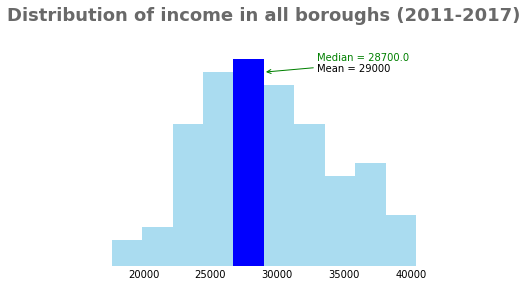

In [11]:
distMedian = ts['Median Amount(£)'].reset_index(level='Year', drop=True)
n, bins, patches = plt.hist(distMedian, bins=10, facecolor='skyblue', linewidth=0.5, alpha=0.7)

# Make one bin stand out   
patches[4].set_fc('b') # Set color
patches[4].set_alpha(1) # Set opacity

#remove spines for presentation
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

#remove y axis and xticks
plt.gca().tick_params(axis=u'both', which=u'both',length=0)
plt.gca().axes.get_yaxis().set_ticks([])

#Arrow and text annotating median and mean
plt.gca().annotate('Median = ' + str(distMedian.median()) +'\n' ,xy=(29000,15), xytext=(33000,15), arrowprops=dict(arrowstyle="->", color='g'), color='g')
plt.gca().text(33000, 15, 'Mean = 29000')

#set title
plt.title('Distribution of income in all boroughs (2011-2017)',y=1.1,fontdict=titlefont)

#plt.savefig('histincome.png', dpi=300, bbox_inches='tight')
plt.show()

# Grouped boxplot

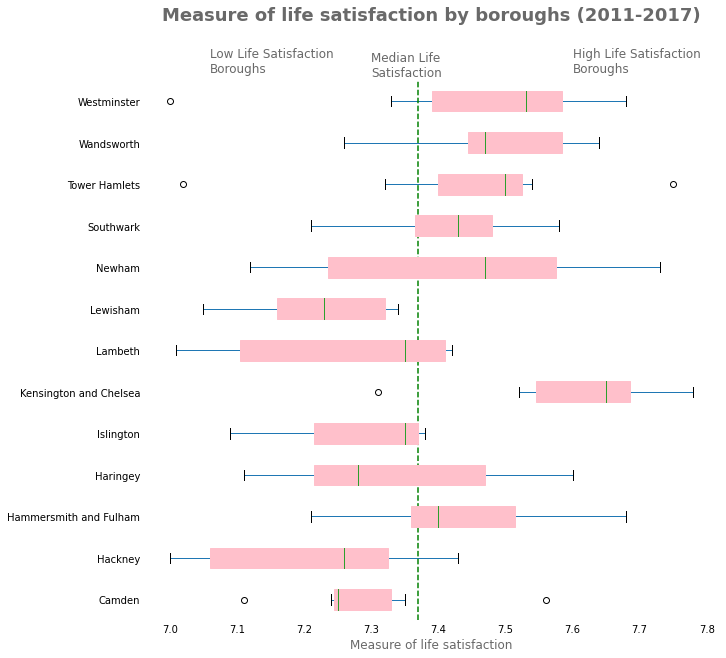

In [12]:
#colour scheme
colours ='pink'
#plot grouped boxplot
ax = distMeasure.reset_index().boxplot(by='Boroughs', vert=False, grid=False, patch_artist=True, boxprops=dict(facecolor=colours, color=colours))

#remove spines for presentation
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#remove ticks
ax.tick_params(axis=u'both', which=u'both',length=0)

#section off low and high by using the median
ax.text(7.3,13.6,'Median Life\nSatisfaction', fontdict=font2)
ax.text(7.6,13.7,'High Life Satisfaction\nBoroughs', fontdict=font2)
ax.text(7.06,13.7,'Low Life Satisfaction\nBoroughs', fontdict=font2)

#remove subtitle
plt.suptitle('')
#set lables
plt.xlabel('Measure of life satisfaction', fontdict=font2)
plt.ylabel('')
plt.title('Measure of life satisfaction by boroughs (2011-2017)',y=1.1,fontdict=titlefont)

#median line
plt.axvline(ts['Measure'].median(), color='green', linestyle='--')

#makes figure bigger
plt.gcf().set_size_inches(10, 10)
#plt.savefig('measureboxplot.png', dpi=300, bbox_inches='tight')
plt.show()

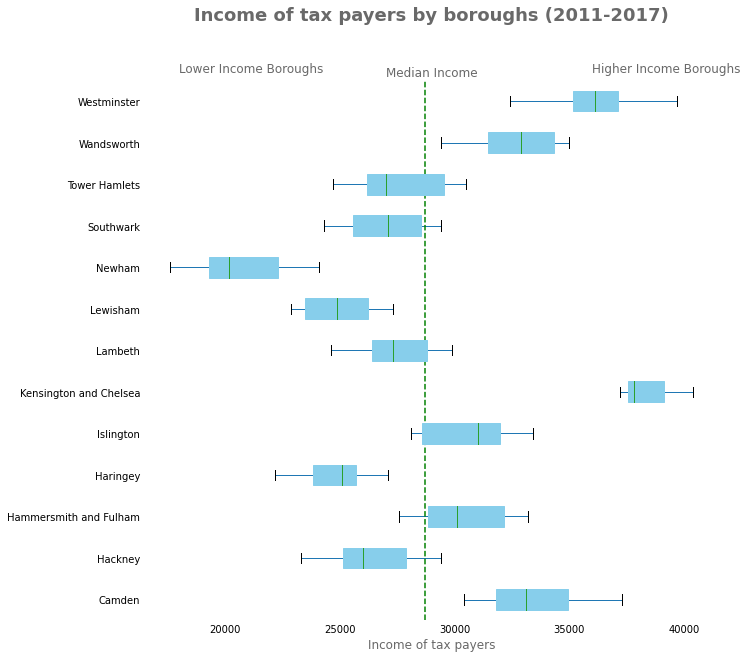

In [13]:
#colour scheme
colours ='skyblue'
#plot grouped boxplot
ax = distMedian.reset_index().boxplot(by='Boroughs', vert=False, grid=False, patch_artist=True, boxprops=dict(facecolor=colours, color=colours))

#remove spines for presentation
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

#section off low and high by using the median
ax.text(27000,13.6,'Median Income', fontdict=font2)
ax.text(36000,13.7,'Higher Income Boroughs', fontdict=font2)
ax.text(18000,13.7,'Lower Income Boroughs', fontdict=font2)

#median line
plt.axvline(ts['Median Amount(£)'].median(), color='green', linestyle='--')

#remove subtitle
plt.suptitle('')
#set lables
plt.xlabel('Income of tax payers', fontdict=font2)
plt.ylabel('')
plt.title('Income of tax payers by boroughs (2011-2017)',y=1.1,fontdict=titlefont)



#make figure bigger
plt.gcf().set_size_inches(10, 10)
#plt.savefig('incomeboxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## slicing data
- using data from the other visualisation split the boroughs: using 4 boroughs of each to keep even

In [14]:
#Highest income boroughs
ts2 = ts
#using slice()
ts2 = ts2.loc[
    #row indexer
    (slice(None),
     ['Kensington and Chelsea','Camden', 'Wandsworth', 'Westminster']), 
    :
]

ts2.head()

Measure  Median Amount(£)
Year Boroughs                                         
2011 Camden                     7.25             30400
     Kensington and Chelsea     7.57             37200
     Wandsworth                 7.46             29400
     Westminster                7.33             32400
2012 Camden                     7.24             31600

In [15]:
#Lowest income boroughs
ts3 = ts
ts3 = ts3.loc[
    #row indexer
    (slice(None),
     ['Newham','Lewisham', 'Haringey', 'Hackney']), 
    :
]
ts3.head()

Measure  Median Amount(£)
Year Boroughs                           
2011 Hackney      7.00             23300
     Haringey     7.11             22200
     Lewisham     7.05             22900
     Newham       7.12             17600
2012 Hackney      7.07             24300

# High income boroughs visualisations

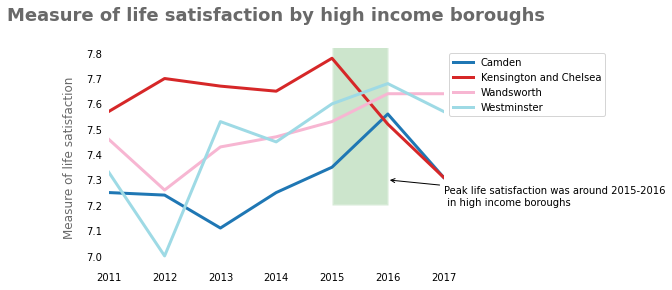

In [16]:
#group by columns sum then unstack
high = ts2['Measure'].groupby(level=['Year','Boroughs']).sum().unstack()

axhigh = high.plot(colormap='tab20',linewidth=3)

#remove spines for presentation
axhigh.spines['top'].set_visible(False)
axhigh.spines['right'].set_visible(False)
axhigh.spines['left'].set_visible(False)
axhigh.spines['bottom'].set_visible(False)

#set labels
axhigh.set_xlabel('')
axhigh.set_ylabel('Measure of life satisfaction',fontdict=font2)
axhigh.set_title('Measure of life satisfaction by high income boroughs',y=1.1, fontdict=titlefont)

#format legend
axhigh.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axhigh.legend(bbox_to_anchor=(1.0,1.0))

#make x and yticks invisible
axhigh.tick_params(axis="x", color="white")
axhigh.tick_params(axis="y", color="white")

#give padding to yaxis label
axhigh.yaxis.labelpad = 10

#highlight important section with patch
rect = plt.Rectangle((pd.Period('2015'), 7.2), # (x,y)
1, # width
1, # height
# You can add rotation as well with 'angle'
alpha=0.2, facecolor="green", edgecolor="white", linewidth=3, linestyle='solid')
axhigh.add_patch(rect)

#annotate patch
textLifeHigh = 'Peak life satisfaction was around 2015-2016\n in high income boroughs'
axhigh.annotate(
# Label and coordinate
textLifeHigh, xy=(pd.Period(2016), 7.3), xytext=(pd.Period(2017), 7.2),
# Custom arrow
arrowprops=dict(arrowstyle="->")
)


#plt.savefig('lifesathigh.png', dpi=300, bbox_inches='tight')
plt.show()


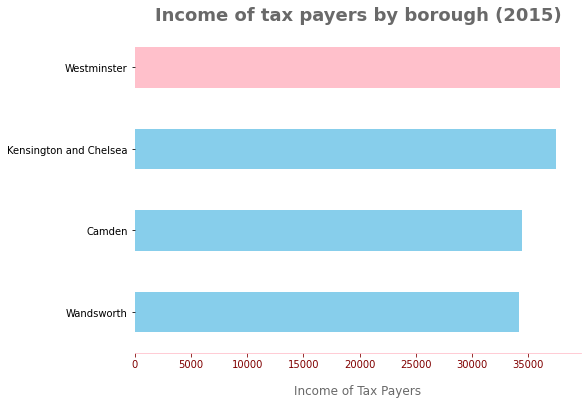

In [17]:
#make fig bigger
fig = plt.figure(figsize=(8,6))
#sort in ascending order
tsSort = ts2.sort_values('Median Amount(£)')
#set to highlight important bar
colours =['skyblue'] * 4
colours[3] ='pink'

ax= tsSort['Median Amount(£)'].xs('2015', level='Year').plot.barh(color=colours)

#remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#make x ticks maroon
ax.tick_params(axis='x', colors='maroon')

#set labels
ax.set_xlabel('Income of Tax Payers', fontdict=font2)
ax.set_ylabel('')
plt.title('Income of tax payers by borough (2015)',fontdict=titlefont)
#pad labels
ax.xaxis.labelpad = 15
#colour spines
plt.setp(ax.spines.values(), color='pink')


#plt.savefig('lifesathigh2015.png', dpi=300, bbox_inches='tight')
plt.show()

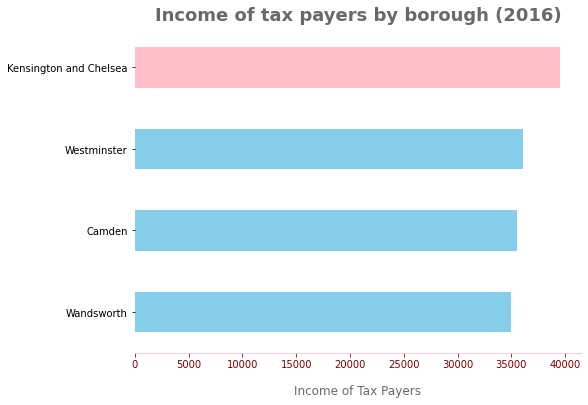

In [18]:
fig = plt.figure(figsize=(8,6))
colours[3] ='pink'
#sort in ascending order
ax= tsSort['Median Amount(£)'].xs('2016', level='Year').plot.barh(color=colours)

#remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='x', colors='maroon')

ax.set_xlabel('Income of Tax Payers',fontdict=font2)
ax.set_ylabel('')
plt.title('Income of tax payers by borough (2016)',fontdict=titlefont)

ax.xaxis.labelpad = 15
plt.setp(ax.spines.values(), color='pink')



#plt.savefig('lifesathigh2016.png', dpi=300, bbox_inches='tight')
plt.show()

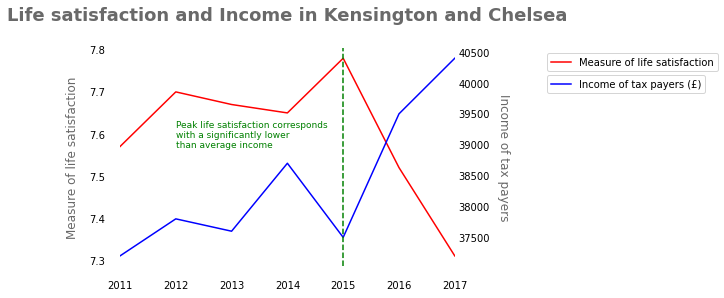

In [19]:
#only ken and chelsea
t = ts.xs(['Kensington and Chelsea'],level=['Boroughs'])
ax1 = t['Measure'].plot(color='red')
#secondary line on different y axis
ax2 = t['Median Amount(£)'].plot(secondary_y=True, color='blue')

#remove spines
ax1.spines['top'].set_visible(False),ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False),ax2.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False),ax2.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False),ax2.spines['left'].set_visible(False)

#customise legends
ax1.legend(['Measure of life satisfaction'],bbox_to_anchor=(1.8,1))
ax2.legend(['Income of tax payers (£)'],bbox_to_anchor=(1.763,0.9))

#remove ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis="y",length=0)
ax1.tick_params(axis='both', which='major', pad=15)

#pad labels
ax1.yaxis.labelpad = 10
ax2.yaxis.labelpad = 20

#set labels
ax1.set_xlabel('')
ax1.set_ylabel('Measure of life satisfaction', fontdict=font2)
plt.ylabel('Income of tax payers', rotation=270, fontdict=font2)
ax1.set_title('Life satisfaction and Income in Kensington and Chelsea',y=1.1, fontdict=titlefont)

#annoate graph
ax2.text(pd.Period(2012), 38950, 'Peak life satisfaction corresponds\nwith a significantly lower\nthan average income' ,fontsize=9, fontdict=font2, color='g')

#line presenting important pattern
plt.axvline(pd.Period(2015), color='green', linestyle='--')


#plt.savefig('ken.png', dpi=300, bbox_inches='tight')
plt.show()

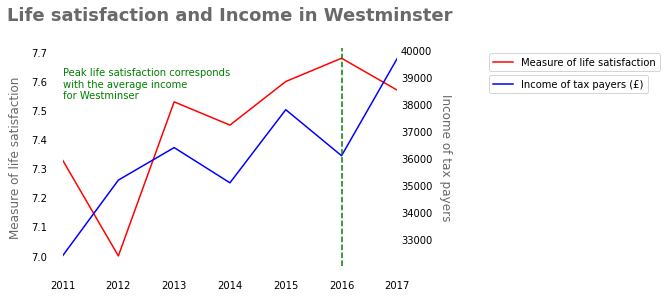

In [20]:
#only westminster
t = ts.xs(['Westminster'],level=['Boroughs'])
ax1 = t['Measure'].plot(color='red')
#secondary line on different y axis
ax2 = t['Median Amount(£)'].plot(secondary_y=True, color='blue')

#remove spines
ax1.spines['top'].set_visible(False),ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False),ax2.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False),ax2.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False),ax2.spines['left'].set_visible(False)

#customise legends
ax1.legend(['Measure of life satisfaction'],bbox_to_anchor=(1.8,1))
ax2.legend(['Income of tax payers (£)'],bbox_to_anchor=(1.763,0.9))

#remove ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis="y",length=0)
ax1.tick_params(axis='both', which='major', pad=15)

#pad labels
ax1.yaxis.labelpad = 10
ax2.yaxis.labelpad = 20

#set labels
ax1.set_xlabel('')
ax1.set_ylabel('Measure of life satisfaction', fontdict=font2)
plt.ylabel('Income of tax payers', rotation=270, fontdict=font2)
ax1.set_title('Life satisfaction and Income in Westminster',y=1.1, fontdict=titlefont)

#annoate graph
ax2.text(pd.Period(2011), 38200, 'Peak life satisfaction corresponds\nwith the average income\nfor Westminser' ,fontsize=10, fontdict=font2, color='g')

#line presenting important pattern
plt.axvline(pd.Period(2016), color='green', linestyle='--')

#plt.savefig('westmin.png', dpi=300, bbox_inches='tight')
plt.show()

# Low income boroughs visualisations

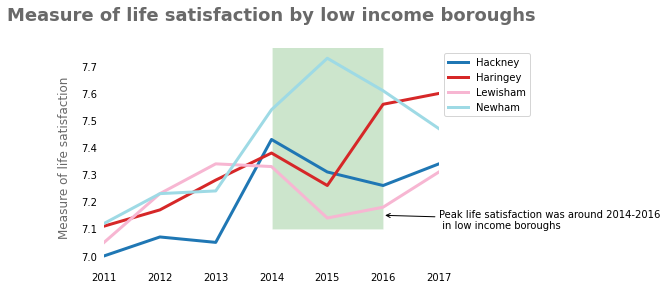

In [21]:
low = ts3['Measure'].groupby(level=['Year','Boroughs']).sum().unstack()
ax = low.plot(colormap='tab20',linewidth=3)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.set_xlabel('')
ax.set_ylabel('Measure of life satisfaction', fontdict=font2)
ax.set_title('Measure of life satisfaction by low income boroughs',y=1.1, fontdict=titlefont)

ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
ax.legend(bbox_to_anchor=(1.0,1.0))

ax.tick_params(axis="x", color="white")
ax.tick_params(axis="y", color="white")

ax.yaxis.labelpad = 10

ax.add_patch(
plt.Rectangle(
(pd.Period(2014), 7.1), # (x,y)
2, # width
1, # height
# You can add rotation as well with 'angle'
alpha=0.2, facecolor="green", edgecolor="white")
)

textLifeLow = 'Peak life satisfaction was around 2014-2016\n in low income boroughs'
plt.annotate(
# Label and coordinate
textLifeLow, xy=(pd.Period(2016), 7.15), xytext=(pd.Period(2017), 7.1),
# Custom arrow
arrowprops=dict(arrowstyle="->")
)
#plt.savefig('lifesatlow.png', dpi=300, bbox_inches='tight')
plt.show()

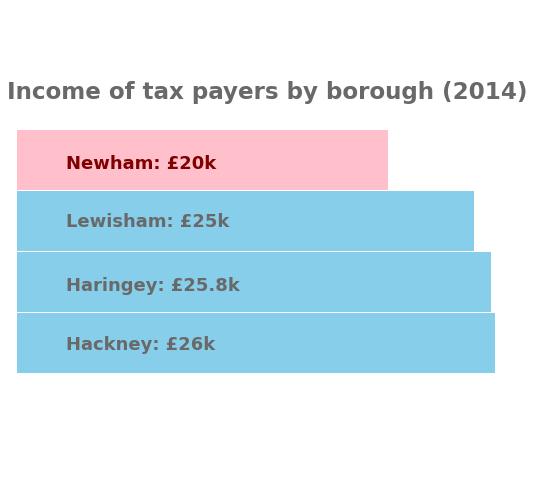

In [22]:
#sort values in descending order
tsSort = ts3.sort_values('Median Amount(£)', ascending=False)

#set colour to highlight important bar
colours =['skyblue'] * 4
colours[3] ='pink'

ax= ts3['Median Amount(£)'].xs('2014', level='Year').to_frame().T.plot.barh( color=colours, edgecolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

ax.set_ylabel('')
ax.xaxis.labelpad = 15

ax.text(2700, -0.2, 'Hackney: £26k' ,fontdict=font3, color='dimgrey')
ax.text(2700, -0.08, 'Haringey: £25.8k' , fontdict=font3, color='dimgrey')
ax.text(2700, 0.05, 'Lewisham: £25k' ,fontdict=font3, color='dimgrey')
ax.text(2700, 0.17, 'Newham: £20k' ,fontdict=font3)

ax.get_legend().remove()


plt.title('Income of tax payers by borough (2014)',y=0.8,fontdict=titlefont, fontsize=23)


#plt.savefig('lifesatlow2014.png', dpi=300, bbox_inches='tight')
plt.gcf().set_size_inches(9, 9)
plt.show()

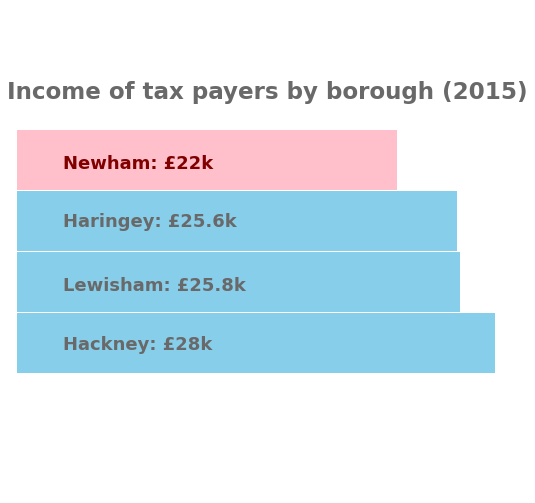

In [23]:
ax= tsSort['Median Amount(£)'].xs('2015', level='Year').to_frame().T.plot.barh(color=colours,edgecolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

ax.set_ylabel('')
ax.xaxis.labelpad = 15

ax.text(2700, -0.2, 'Hackney: £28k' ,fontdict=font3, color='dimgrey')
ax.text(2700, -0.08, 'Lewisham: £25.8k' , fontdict=font3, color='dimgrey')
ax.text(2700, 0.05, 'Haringey: £25.6k ' ,fontdict=font3, color='dimgrey')
ax.text(2700, 0.17, 'Newham: £22k' ,fontdict=font3)

ax.get_legend().remove()


plt.title('Income of tax payers by borough (2015)',y=0.8,fontdict=titlefont, fontsize=23)

#plt.savefig('lifesatlow2015.png', dpi=300, bbox_inches='tight')
plt.gcf().set_size_inches(9, 9)
plt.show()

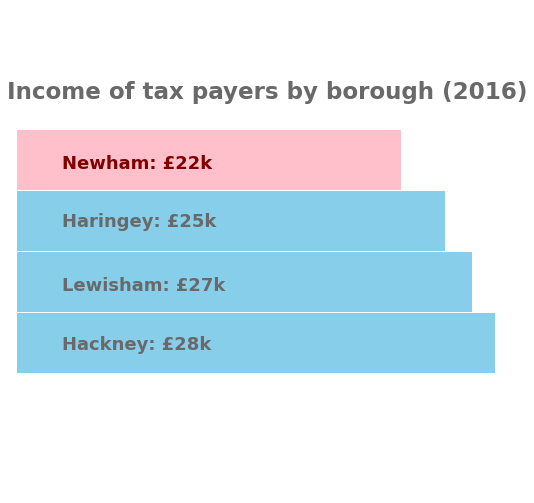

In [24]:
ax= tsSort['Median Amount(£)'].xs('2016', level='Year').to_frame().T.plot.barh(color=colours, edgecolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

ax.set_ylabel('')
ax.xaxis.labelpad = 15

ax.text(2700, -0.2, 'Hackney: £28k' ,fontdict=font3, color='dimgrey')
ax.text(2700, -0.08, 'Lewisham: £27k' ,fontdict=font3, color='dimgrey')
ax.text(2700, 0.05, 'Haringey: £25k' ,fontdict=font3, color='dimgrey')
ax.text(2700, 0.17, 'Newham: £22k ' ,fontdict=font3)

ax.get_legend().remove()

plt.title('Income of tax payers by borough (2016)',y=0.8,fontdict=titlefont, fontsize=23)


#plt.savefig('lifesatlow2016.png', dpi=300, bbox_inches='tight')
plt.gcf().set_size_inches(9, 9)
plt.show()

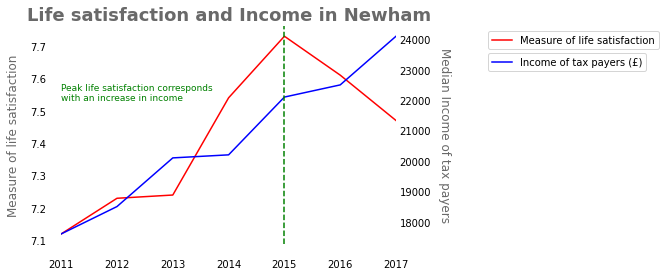

In [25]:
t = ts.xs(['Newham'],level=['Boroughs'])
ax1 = t['Measure'].plot(color='red')
ax2 = t['Median Amount(£)'].plot(secondary_y=True, color='blue')

ax1.spines['top'].set_visible(False),ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False),ax2.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False),ax2.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False),ax2.spines['left'].set_visible(False)

ax1.legend(['Measure of life satisfaction'],bbox_to_anchor=(1.8,1))
ax2.legend(['Income of tax payers (£)'],bbox_to_anchor=(1.763,0.9))


ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis="y",length=0)
ax1.tick_params(axis='both', which='major', pad=15)

ax1.yaxis.labelpad = 10
ax2.yaxis.labelpad = 20

ax1.set_xlabel('')
ax1.set_ylabel('Measure of life satisfaction', fontdict=font2)
ax1.set_title('Life satisfaction and Income in Newham', fontdict=titlefont)

textnew = 'Life satisfaction dropped\n as income increased around 2016'

ax2.text(pd.Period(2011), 22000, 'Peak life satisfaction corresponds\nwith an increase in income' ,fontsize=9, fontdict=font2, color='g')
plt.axvline(pd.Period(2015), color='green', linestyle='--')

plt.ylabel('Median Income of tax payers', rotation=270, fontdict=font2)
#plt.savefig('newham.png', dpi=300, bbox_inches='tight')
plt.show()

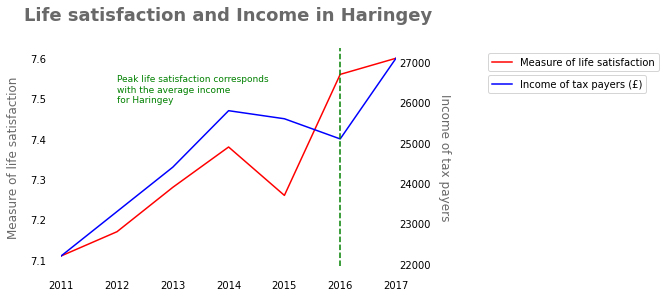

In [26]:
t = ts.xs(['Haringey'],level=['Boroughs'])
ax1 = t['Measure'].plot(color='red')
ax2 = t['Median Amount(£)'].plot(secondary_y=True, color='blue')

ax1.spines['top'].set_visible(False),ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False),ax2.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False),ax2.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False),ax2.spines['left'].set_visible(False)

ax1.legend(['Measure of life satisfaction'],bbox_to_anchor=(1.8,1))
ax2.legend(['Income of tax payers (£)'],bbox_to_anchor=(1.763,0.9))


ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis="y",length=0)
ax1.tick_params(axis='both', which='major', pad=15)

ax1.yaxis.labelpad = 10
ax2.yaxis.labelpad = 20

ax1.set_xlabel('')
ax1.set_ylabel('Measure of life satisfaction', fontdict=font2)
ax1.set_title('Life satisfaction and Income in Haringey',y=1.1, fontdict=titlefont)

ax2.text(pd.Period(2012), 26000, 'Peak life satisfaction corresponds\nwith the average income\nfor Haringey' ,fontsize=9, fontdict=font2, color='g')
plt.axvline(pd.Period(2016), color='green', linestyle='--')

plt.ylabel('Income of tax payers', rotation=270, fontdict=font2)
#plt.savefig('haringey.png', dpi=300, bbox_inches='tight')
#print(t.describe())
plt.show()

# Correlation scatterplot with regression line

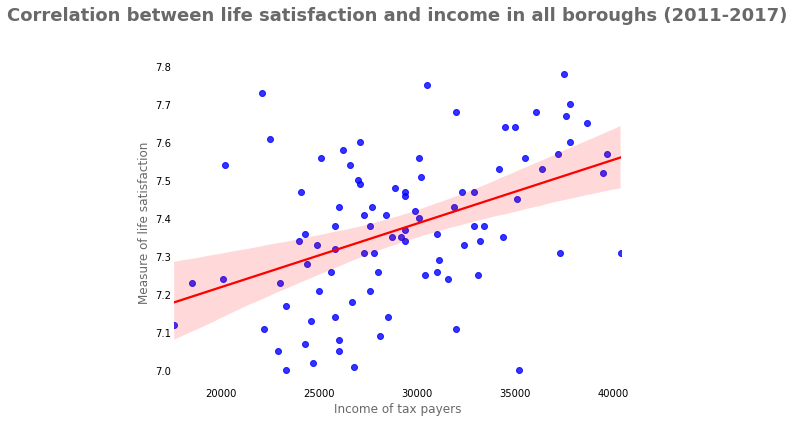

In [29]:
fig = plt.figure(figsize=(8,6))
y = ts['Measure']
x= ts['Median Amount(£)']
ax = sns.regplot(data=ts,x=x,y=y, scatter_kws={"color": "b"}, line_kws={"color": "red"})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.xlabel('Income of tax payers', fontdict=font2)
plt.ylabel('Measure of life satisfaction', fontdict=font2)
plt.title('Correlation between life satisfaction and income in all boroughs (2011-2017)',y=1.1, fontdict=titlefont)

#plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()

##### References: 
- https://python-graph-gallery.com/
- https://medium.com/@arseniytyurin/how-to-make-your-histogram-shine-69e432be39ca
- https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot
- https://pythonpedia.com/en/knowledge-base/6326360/python--matplotlib---probability-plot-for-several-data-set